In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

In [2]:
df = pd.read_csv("D:\\BCU Final\\ML\\Dataset\\NON EEG\\mergeddata\\features3.csv")

In [3]:

df.replace(to_replace="Relax", value=0, inplace=True)
df.replace(to_replace="EmotionalStress", value=1, inplace=True)
df.replace(to_replace="CognitiveStress", value=2, inplace=True)
df.replace(to_replace="PhysicalStress", value=3, inplace=True)

df


,Subject ID,Second,Label,SpO2mean,SpO2median,SpO2std,SpO2min,SpO2max,HeartRatemean,HeartRatemedian,HeartRatestd,HeartRatemin,HeartRatemax
0,Subject 1,0.0,2,96.000000,96.0,0.894427,95.0,97.0,83.500000,84.0,3.507136,79.0,88.0
1,Subject 1,0.0,1,94.833333,95.0,0.408248,94.0,95.0,80.000000,77.0,8.944272,74.0,98.0
2,Subject 1,0.0,3,96.166667,96.0,0.408248,96.0,97.0,95.000000,93.0,12.214745,79.0,111.0
3,Subject 1,0.0,0,95.500000,96.0,0.688247,94.0,96.0,79.650000,78.0,12.376867,68.0,124.0
4,Subject 1,1.0,2,95.833333,96.0,0.752773,95.0,97.0,83.166667,83.0,3.488075,79.0,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,Subject 9,58.0,0,94.950000,95.0,0.825578,94.0,98.0,77.700000,78.0,5.867843,70.0,90.0
4796,Subject 9,59.0,2,96.333333,96.0,1.032796,95.0,98.0,89.166667,88.0,2.401388,88.0,94.0
4797,Subject 9,59.0,1,95.857143,96.0,0.690066,95.0,97.0,77.714286,77.0,4.608481,72.0,86.0
4798,Subject 9,59.0,3,95.800000,97.0,2.167948,92.0,97.0,97.400000,97.0,9.126883,87.0,112.0


In [4]:
df.drop(['SpO2std'], axis=1, inplace=True)

In [5]:
df.drop(['SpO2mean'], axis=1, inplace=True)


In [6]:
df.drop(['HeartRatemean','HeartRatestd'], axis=1, inplace=True)

In [7]:
df.drop(['Second'], axis=1, inplace=True)


In [8]:
df.drop(['Subject ID'], axis=1, inplace=True)

In [9]:
df

,Label,SpO2median,SpO2min,SpO2max,HeartRatemedian,HeartRatemin,HeartRatemax
0,2,96.0,95.0,97.0,84.0,79.0,88.0
1,1,95.0,94.0,95.0,77.0,74.0,98.0
2,3,96.0,96.0,97.0,93.0,79.0,111.0
3,0,96.0,94.0,96.0,78.0,68.0,124.0
4,2,96.0,95.0,97.0,83.0,79.0,88.0
...,...,...,...,...,...,...,...
4795,0,95.0,94.0,98.0,78.0,70.0,90.0
4796,2,96.0,95.0,98.0,88.0,88.0,94.0
4797,1,96.0,95.0,97.0,77.0,72.0,86.0
4798,3,97.0,92.0,97.0,97.0,87.0,112.0


In [10]:
y = df['Label']
X = df.drop(['Label'],axis=1)


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Models without Hyperparameter Tunning

In [20]:
# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
# XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

In [24]:
# Ensemble Learning (Random Forest)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [25]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

In [32]:
def evaluate_model(model, preds, model_name):
    accuracy = accuracy_score(y_test, preds)
    class_report = classification_report(y_test, preds)
    confusion_mat = confusion_matrix(y_test, preds)
    
    print(f"Results for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", class_report)
    print("Confusion Matrix:\n", confusion_mat)

evaluate_model(xgb_model, xgb_preds, "XGBoost")
evaluate_model(rf_model, rf_preds, "Random Forest")
evaluate_model(dt_model, dt_preds, "Decision Tree")

Results for XGBoost:
Accuracy: 0.9760
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       249
           1       0.97      0.97      0.97       236
           2       0.99      0.97      0.98       246
           3       0.99      0.99      0.99       229

    accuracy                           0.98       960
   macro avg       0.98      0.98      0.98       960
weighted avg       0.98      0.98      0.98       960

Confusion Matrix:
 [[244   3   0   2]
 [  7 228   1   0]
 [  3   3 239   1]
 [  1   0   2 226]]
Results for Random Forest:
Accuracy: 0.9750
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       249
           1       0.96      0.96      0.96       236
           2       0.99      0.99      0.99       246
           3       0.99      1.00      0.99       229

    accuracy                           0.97       960
   macro avg 

In [33]:
xgb_model.save_model('xgb_model.bin')

# Models with Hyperparameter Tunning

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       249
           1       0.96      0.97      0.96       236
           2       0.99      0.98      0.99       246
           3       1.00      0.99      0.99       229

    accuracy                           0.98       960
   macro avg       0.98      0.98      0.98       960
weighted avg       0.98      0.98      0.98       960

Confusion Matrix:
[[242   6   0   1]
 [  6 229   1   0]
 [  1   4 241   0]
 [  1   0   1 227]]
Accuracy score: 0.978125


C:\Users\pojit\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


['random_forest_model.pkl']

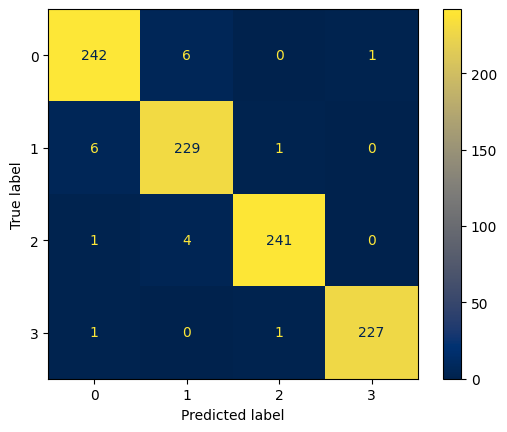

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix , plot_confusion_matrix
# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, n_jobs=-1)

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator
best_params = grid_search.best_params_
best_estimator_rf  = grid_search.best_estimator_

# Fit the best estimator to your data
best_estimator_rf.fit(X_train, y_train)

# Predict using the best estimator
y_pred_rf = best_estimator_rf.predict(X_test)

# Print the best parameters
print("Best Parameters:", best_params)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred_rf ))
conf = confusion_matrix(y_test, y_pred_rf )
print("Confusion Matrix:")
print(conf)

# Plot confusion matrix
plot_confusion_matrix(best_estimator_rf, X_test, y_test, cmap="cividis")

from sklearn.metrics import accuracy_score

print("Accuracy score: {}".format(accuracy_score(y_test,y_pred_rf )))

import joblib
# Save the Random Forest model
joblib.dump(best_estimator_rf, 'random_forest_model.pkl')

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have already trained your Random Forest classifier and obtained predictions y_pred_rf
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1-Score:", f1_rf)


Random Forest Precision: 0.9782587975933493
Random Forest Recall: 0.978125
Random Forest F1-Score: 0.978170791252393


Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.9}
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       249
           1       0.98      0.97      0.98       236
           2       0.99      0.98      0.99       246
           3       0.98      0.99      0.99       229

    accuracy                           0.98       960
   macro avg       0.98      0.98      0.98       960
weighted avg       0.98      0.98      0.98       960

Confusion Matrix:
[[244   2   0   3]
 [  7 229   0   0]
 [  2   2 241   1]
 [  0   0   2 227]]
Accuracy score: 0.9802083333333333


C:\Users\pojit\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


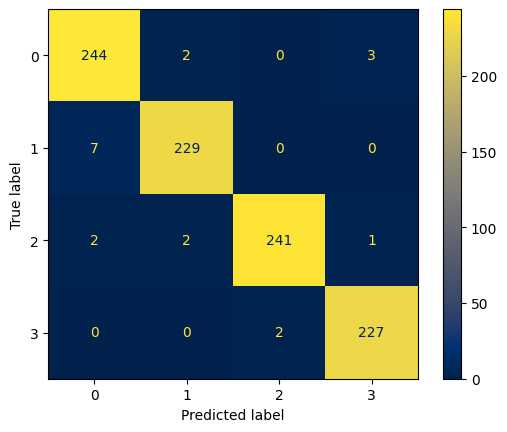

In [21]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Create the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective="multi:softmax", random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5, n_jobs=-1)

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator
best_params = grid_search.best_params_
best_estimator_xgb = grid_search.best_estimator_

# Fit the best estimator to your data
best_estimator_xgb.fit(X_train, y_train)

# Predict using the best estimator
y_pred_xgb = best_estimator_xgb.predict(X_test)

# Print the best parameters
print("Best Parameters:", best_params)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred_xgb))
conf = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix:")
print(conf)

# Plot confusion matrix
plot_confusion_matrix(best_estimator_xgb, X_test, y_test, cmap="cividis")

from sklearn.metrics import accuracy_score

print("Accuracy score: {}".format(accuracy_score(y_test,y_pred_xgb)))
best_estimator_xgb.save_model('xgboost_model.model')

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have already trained your XGBoost classifier and obtained predictions y_pred_xgb
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')

print("XGBoost Precision:", precision_xgb)
print("XGBoost Recall:", recall_xgb)
print("XGBoost F1-Score:", f1_xgb)


XGBoost Precision: 0.9803132614800033
XGBoost Recall: 0.9802083333333333
XGBoost F1-Score: 0.9802210070222702
